### keras 中的model
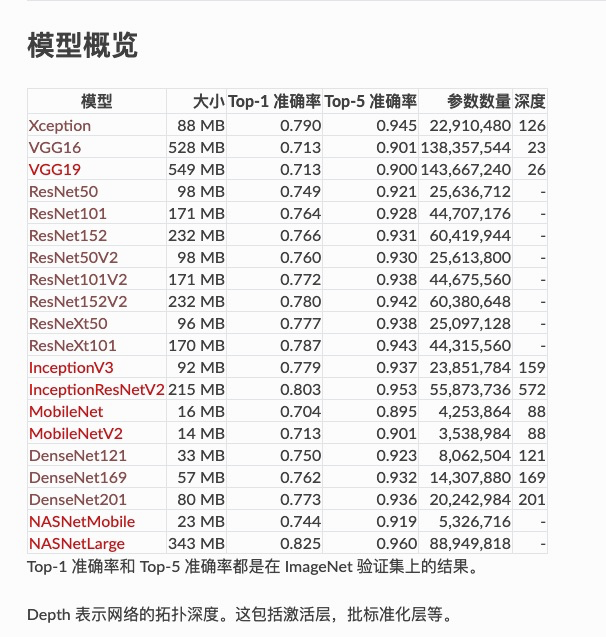

### keras 中层调用方式
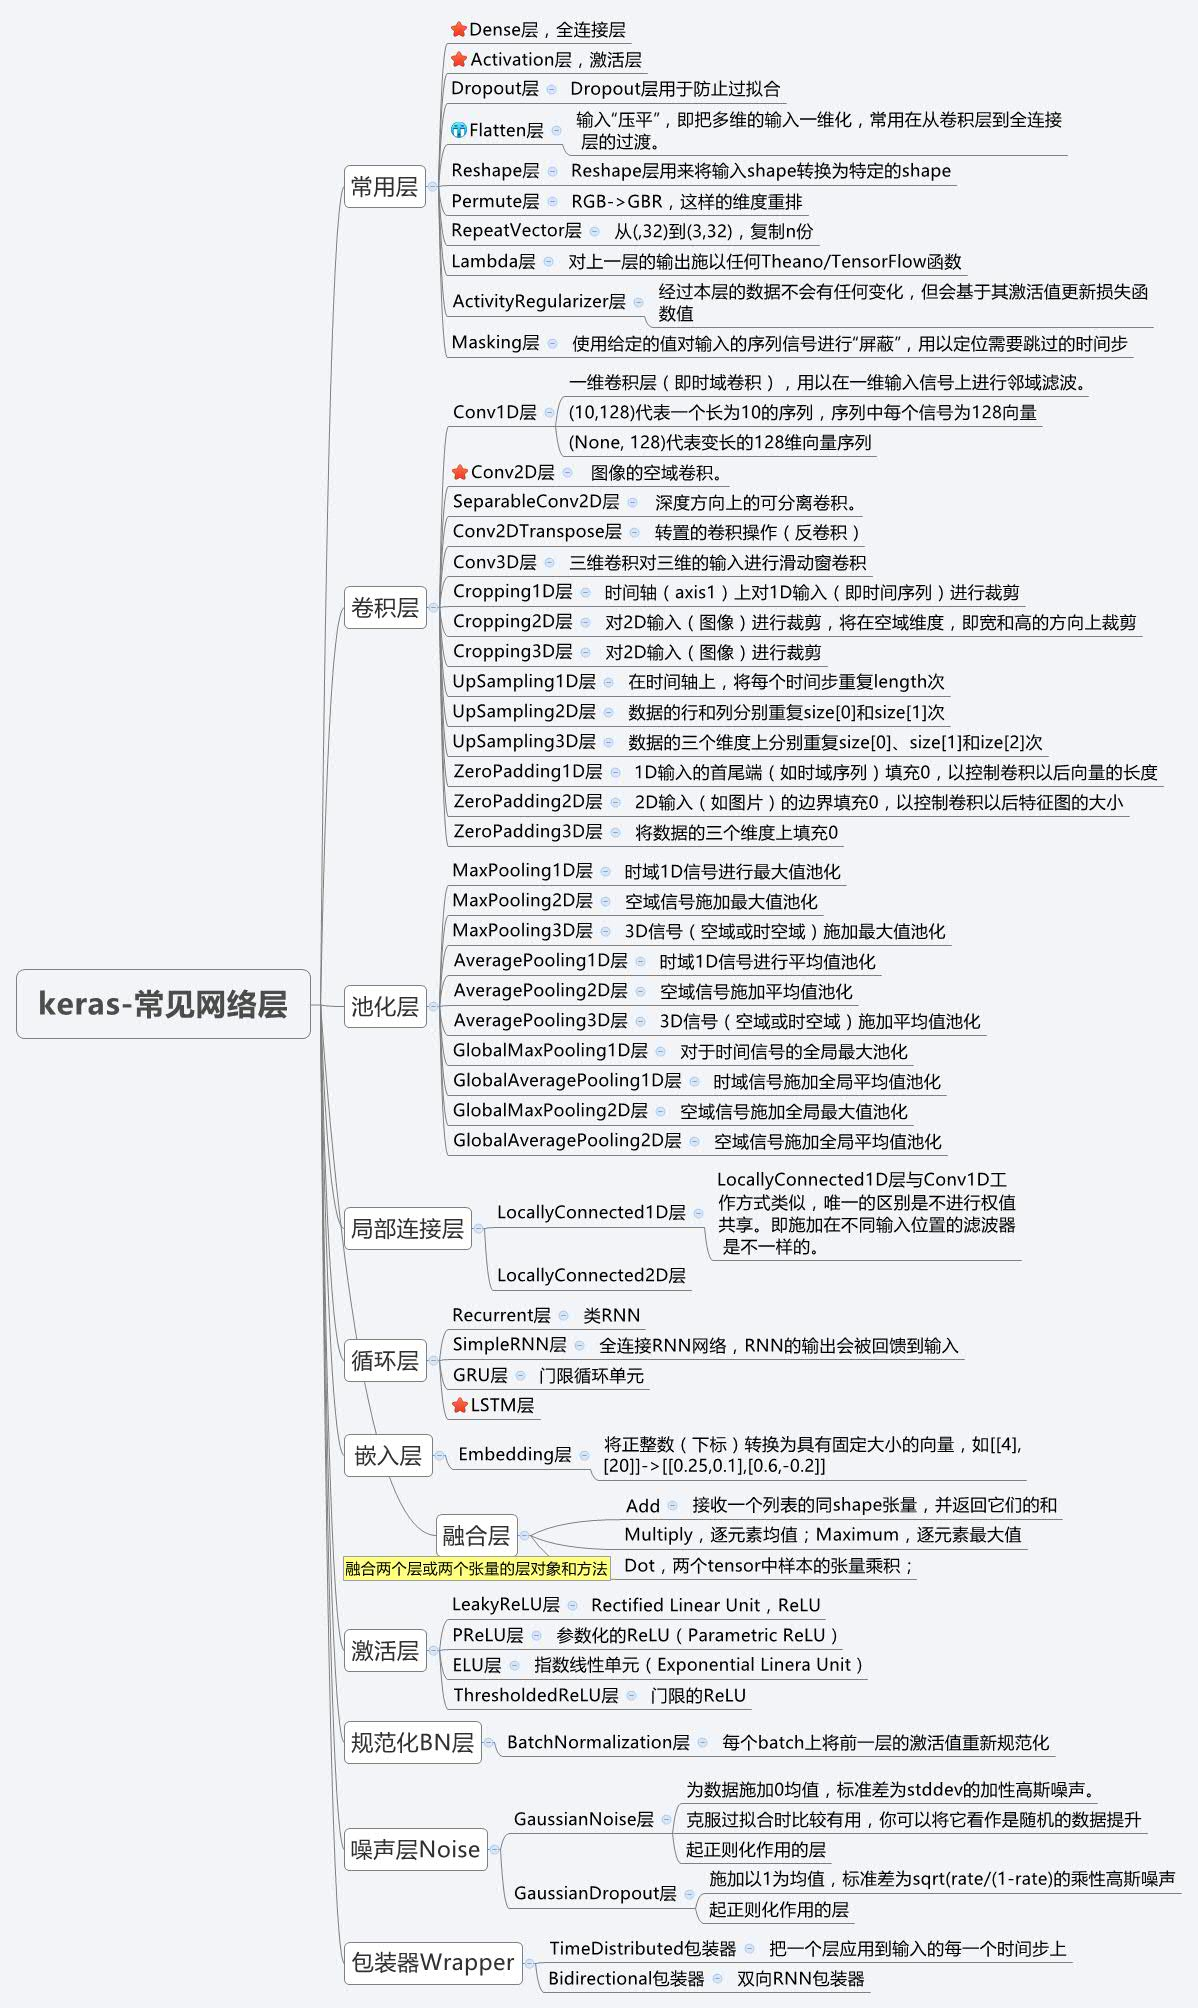
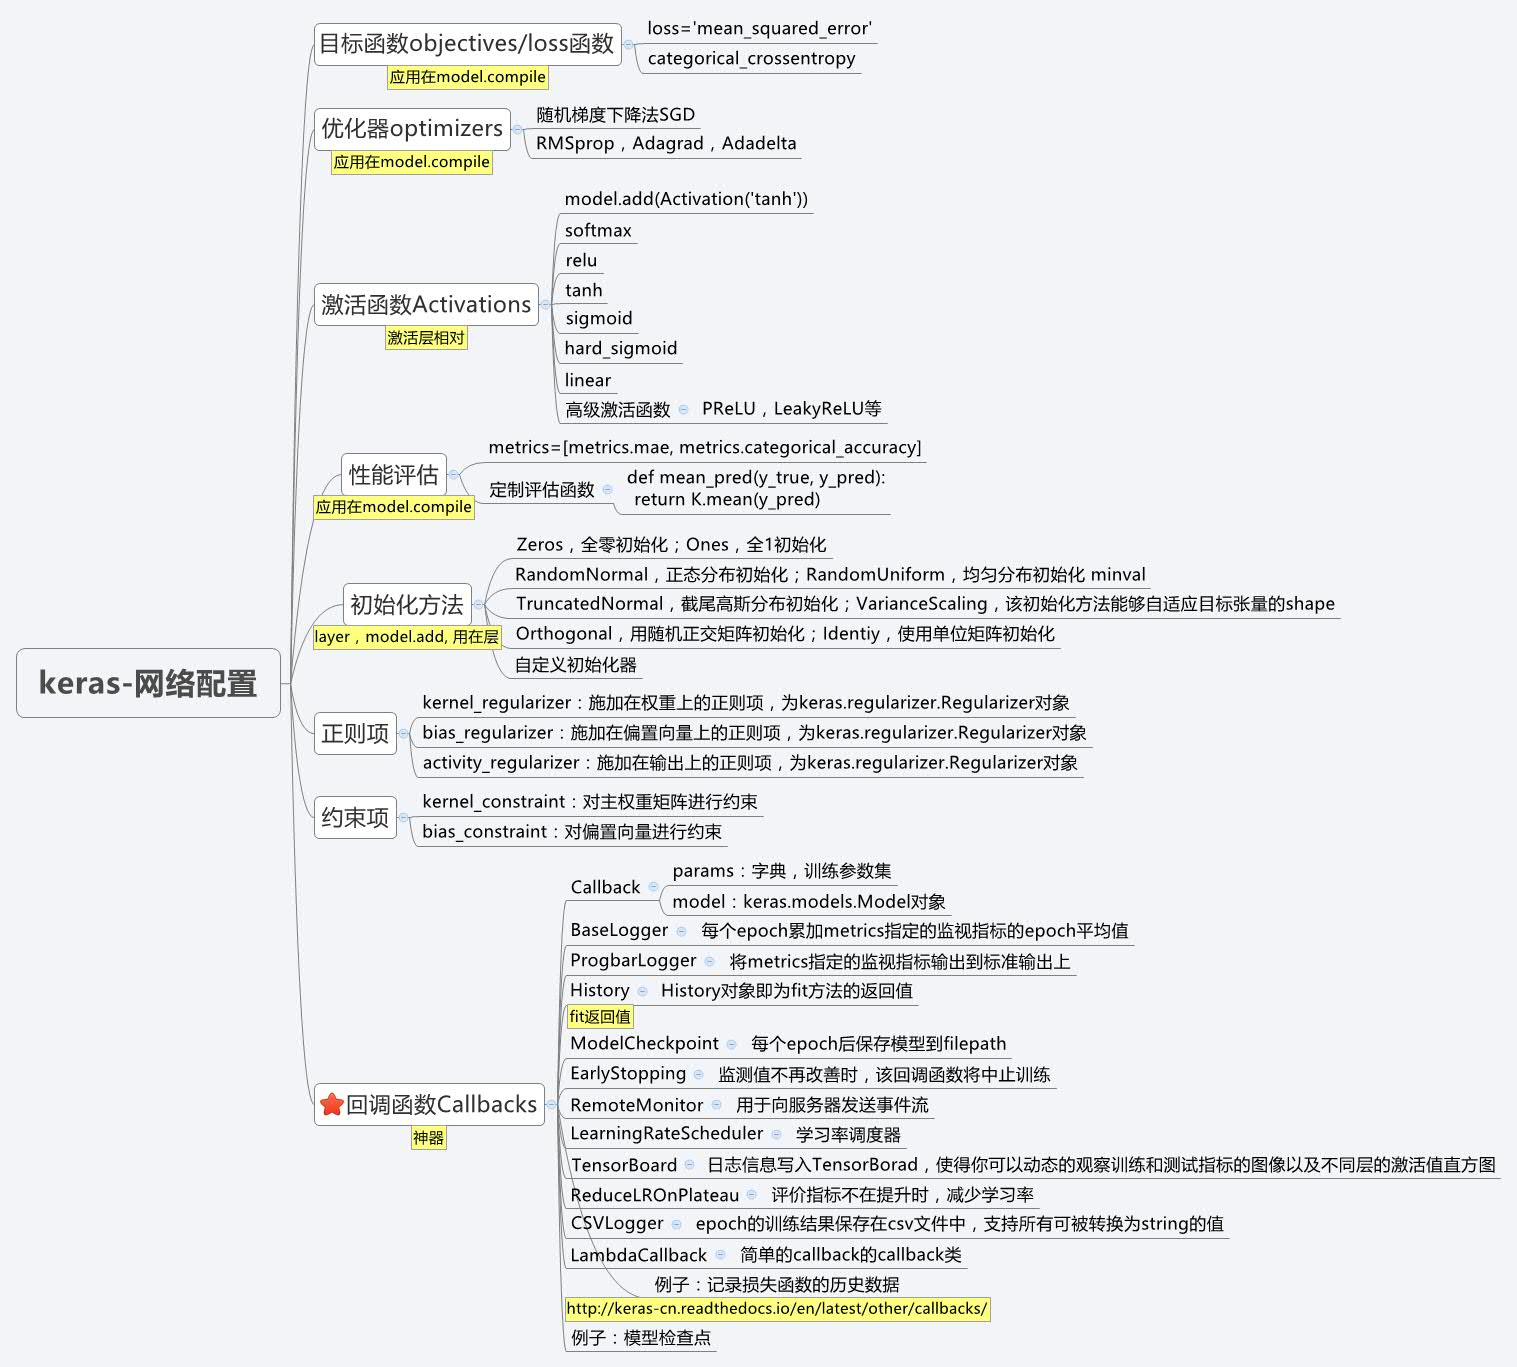
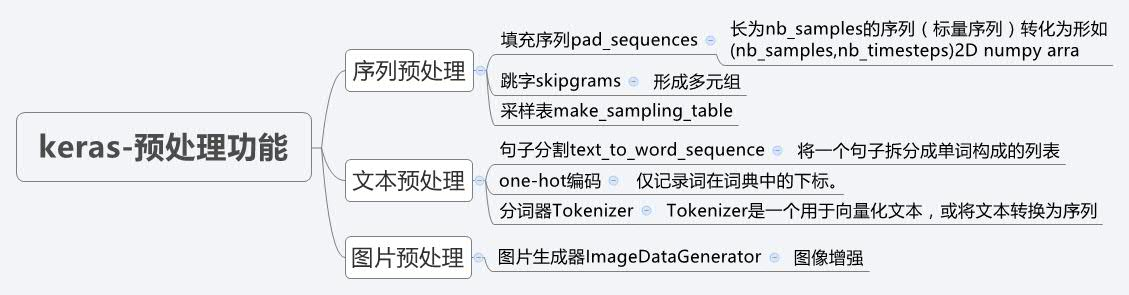

In [5]:
# Standard Imports
import os
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Visualization
import matplotlib.image as implt # Visualization
import seaborn as sns # Visualization


# For Network
import tensorflow as tf
#https://keras.io/zh/applications/

from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import datetime
from sklearn.metrics import confusion_matrix

### 改写VGG16

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

TARGET_SIZE = (300, 300)
GREY = (3,)
INPUT_SIZE = TARGET_SIZE + GREY

In [3]:

vgg16 = VGG16(input_shape=INPUT_SIZE, weights='imagenet', include_top=False)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [4]:
def craete_model_vgg16():
    
    # Load  model without the top layer
    vgg_model = VGG16(input_shape=INPUT_SIZE, weights='imagenet', include_top=False)
    
    # Freeze
    vgg_model.trainable = False
    
     #New classifier layers
    flatten = Flatten()(vgg_model.output)
    fc1 = Dense(units=512, activation='relu')(flatten)
    dropout = Dropout(0.05)(fc1)
    output = Dense(2, activation='softmax')(dropout)
    
    # Define a new Model
    model = Model(inputs=vgg_model.input, outputs=output)
    
    # Summary
    model.summary()
    
    return model


model = craete_model_vgg16()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [12]:
def craete_model_vgg16_2():
    
    # Load  model without the top layer
    vgg_model = VGG16(input_shape=INPUT_SIZE, weights='imagenet', include_top=False)
    
    # Freeze
    vgg_model.trainable = False
    out = vgg_model.layers[-1].output
    out = Flatten()(out)
    out  = Dense(1024, activation='relu')(out)
    # 因为前面输出的dense feature太多了，我们这里加入dropout layer来防止过拟合
    out = Dropout(0.5)(out)
    out = Dense(512, activation='relu')(out)
    out = Dropout(0.3)(out)
    output =Dense(2, activation='sigmoid')(out)

    # Define a new Model
    model = Model(inputs=vgg_model.input, outputs=output)
    
    # Summary
    model.summary()
    
    return model


model = craete_model_vgg16_2()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0   

### 改写 DenseNet169

In [14]:
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np

TARGET_SIZE = (300, 300)
GREY = (3,)
INPUT_SIZE = TARGET_SIZE + GREY

In [15]:
denseNet169 = DenseNet169(input_shape=INPUT_SIZE, weights='imagenet', include_top=False)
denseNet169.summary()

51879936/51877672 [==============================] - 198s 4us/step
Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 306, 306, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
_____________________

__________________________________________________________________________________________________
conv5_block24_0_relu (Activatio (None, 9, 9, 1376)   0           conv5_block24_0_bn[0][0]         
__________________________________________________________________________________________________
conv5_block24_1_conv (Conv2D)   (None, 9, 9, 128)    176128      conv5_block24_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block24_1_bn (BatchNormal (None, 9, 9, 128)    512         conv5_block24_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block24_1_relu (Activatio (None, 9, 9, 128)    0           conv5_block24_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block24_2_conv (Conv2D)   (None, 9, 9, 32)     36864       conv5_block24_1_relu[0][0]       
__________

In [17]:
def craete_model_desnet():
    
    # Load  model without the top layer
    desnet_model = DenseNet169(input_shape=INPUT_SIZE, weights='imagenet', include_top=False)
    
    # Freeze
    desnet_model.trainable = False
    out = desnet_model.layers[-1].output
    out = Flatten()(out)
    out  = Dense(1024, activation='relu')(out)
    # 因为前面输出的dense feature太多了，我们这里加入dropout layer来防止过拟合
    out = Dropout(0.5)(out)
    out = Dense(512, activation='relu')(out)
    out = Dropout(0.3)(out)
    output =Dense(2, activation='sigmoid')(out)

    # Define a new Model
    model = Model(inputs=desnet_model.input, outputs=output)
    
    # Summary
    model.summary()
    
    return model


model = craete_model_desnet()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 306, 306, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

Total params: 151,188,546
Trainable params: 138,545,666
Non-trainable params: 12,642,880
__________________________________________________________________________________________________


### 改写Xception

In [ ]:
keras.applications.xception.Xception

In [2]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
import numpy as np

TARGET_SIZE = (300, 300)
GREY = (3,)
INPUT_SIZE = TARGET_SIZE + GREY

In [3]:
xception = Xception(input_shape=INPUT_SIZE, weights='imagenet', include_top=False)
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [7]:
def craete_model_xception():
    
    # Load  model without the top layer
    xception_model = Xception(input_shape=INPUT_SIZE, weights='imagenet', include_top=False)
    
    # Freeze
    xception_model.trainable = False
    out = xception_model.layers[-1].output
    out = Flatten()(out)
    out  = Dense(1024, activation='relu')(out)
    # 因为前面输出的dense feature太多了，我们这里加入dropout layer来防止过拟合
    out = Dropout(0.5)(out)
    out = Dense(512, activation='relu')(out)
    out = Dropout(0.3)(out)
    output =Dense(2, activation='sigmoid')(out)

    # Define a new Model
    model = Model(inputs=xception_model.input, outputs=output)
    
    # Summary
    model.summary()
    
    return model


model = craete_model_xception()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

### alexnet

In [21]:

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
import numpy as np
seed = 7
np.random.seed(seed)

# 创建模型序列
model = Sequential()
#第一层卷积网络，使用96个卷积核，大小为11x11步长为4， 要求输入的图片为227x227， 3个通道，不加边，激活函数使用relu
model.add(Conv2D(96, (11, 11), strides=(1, 1), input_shape=(28, 28, 1), padding='same', activation='relu',
                 kernel_initializer='uniform'))
# 池化层
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
# 第二层加边使用256个5x5的卷积核，加边，激活函数为relu
model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
#使用池化层，步长为2
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
# 第三层卷积，大小为3x3的卷积核使用384个
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
# 第四层卷积,同第三层
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
# 第五层卷积使用的卷积核为256个，其他同上
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 256)         8

#### Flatten
* Flatten层用来将输入“压平”，即把多维的输入一维化，常用在从卷积层到全连接层的过渡。Flatten不影响batch的大小。
* keras.layers.core.Flatten()

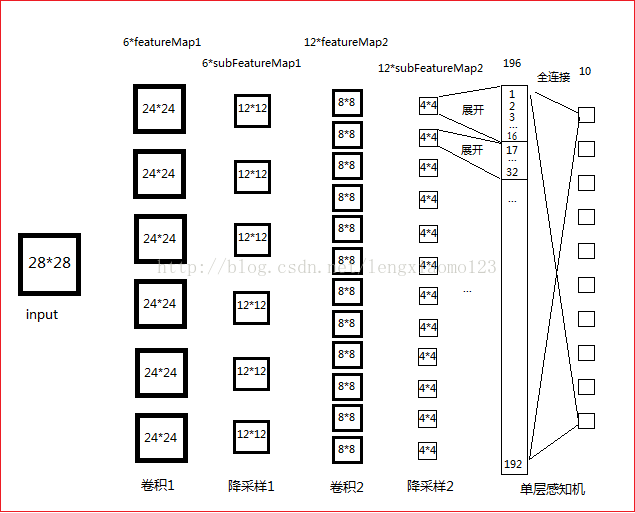

#### Dropout
* 为输入数据施加Dropout。Dropout将在训练过程中每次更新参数时随机断开一定百分比（p）的输入神经元连接，Dropout层用于防止过拟合。
* keras.layers.core.Dropout(p) ；p：0~1的浮点数，控制需要断开的链接的比例 

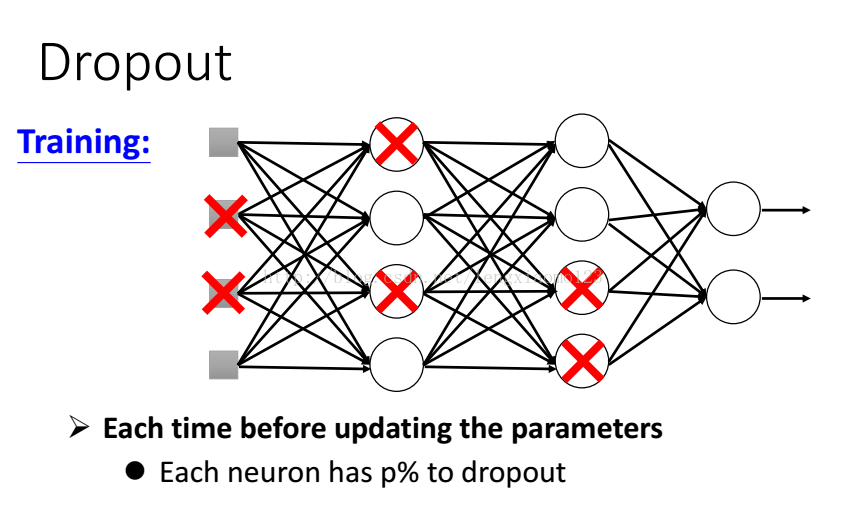

#### Dense（全连接层）
  图中的箭头
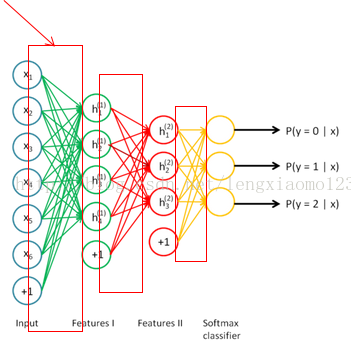

keras.layers.core.Dense ( units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None  )
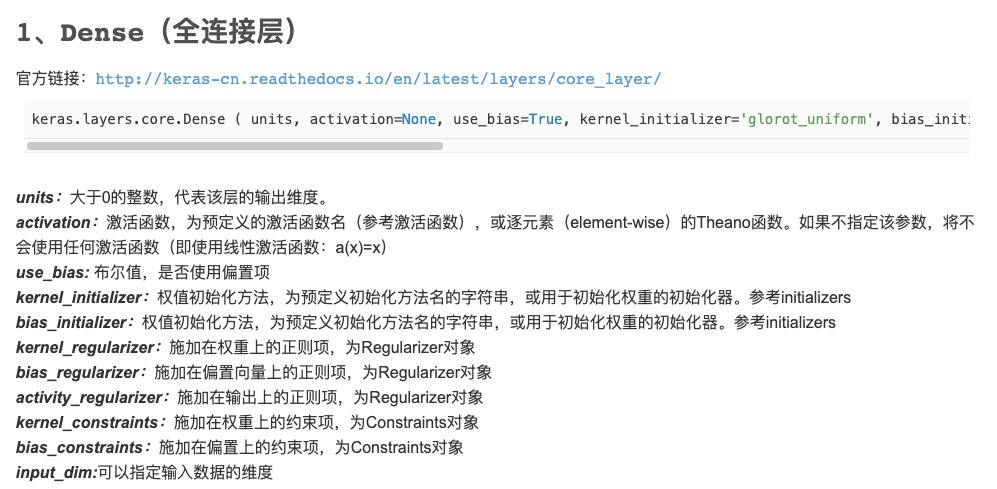

#### 卷积层
* Convolution2D层
* Convolution3D层


#### 池化层

.池化层主要的作用
（1）首要作用，下采样（downsamping）

（2）降维、去除冗余信息、对特征进行压缩、简化网络复杂度、减小计算量、减小内存消耗等等。各种说辞吧，总的理解就是减少参数量。

（3）实现非线性（这个可以想一下，relu函数，是不是有点类似的感觉？）。

（4）可以扩大感知野。

（5）可以实现不变性，其中不变形性包括，平移不变性、旋转不变性和尺度不变性。



* MaxPooling2D层
keras.layers.pooling.MaxPooling2D( pool_size=(2, 2), strides=None, padding='valid', data_format=None )

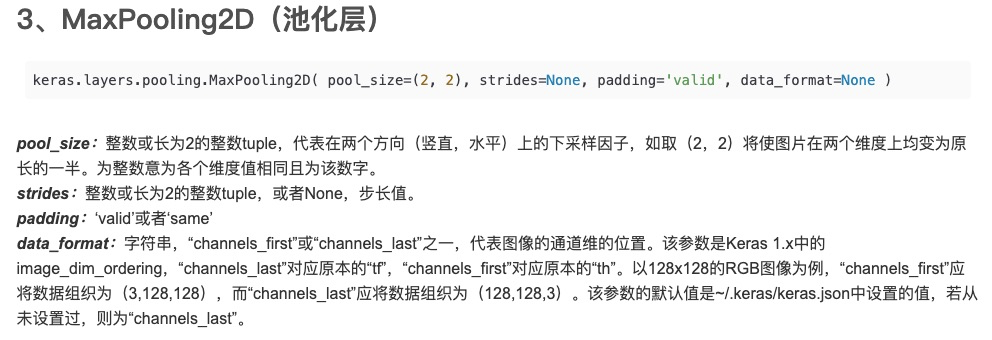

* MaxPooling3D层
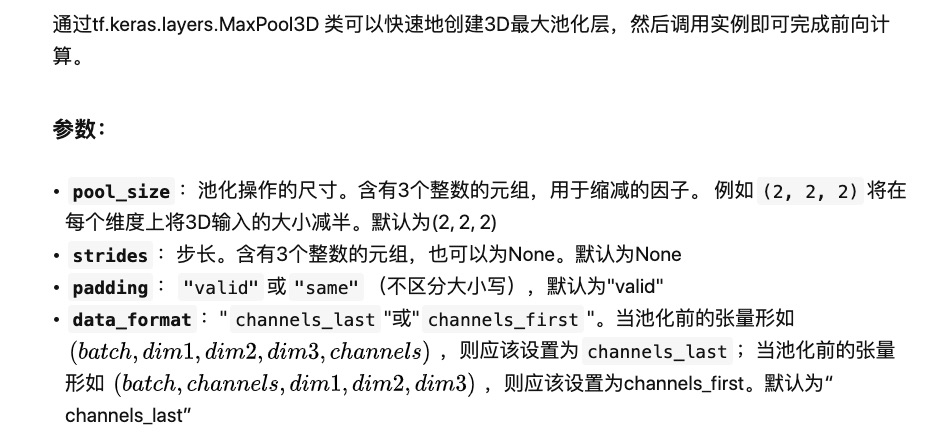

* AveragePooling2D层
* AveragePooling3D层

#### Conv2D （卷积层）

官方链接： http://keras-cn.readthedocs.io/en/latest/layers/convolutional_layer/


keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1,1), padding='valid', data_format=None, dilation_rate=(1,1),activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,bias_constraint=None, input_shape = (rows,cols,channels) )



* filters：卷积核的数目（即输出的维度）
* kernel_size：单个整数或由两个整数构成的list/tuple，卷积核的宽度和长度。如为单个整数，则表示在各个空间维度的相同长度。
* strides：单个整数或由两个整数构成的list/tuple，为卷积的步长。如为单个整数，则表示在各个空间维度的相同步长。任何不为1的strides均与任何不为1的dilation_rata均不兼容
* padding：补0策略，为“valid”, “same” 。“valid”代表只进行有效的卷积，即对边界数据不处理。“same”代表保留边界处的卷积结果，通常会导致输出shape与输入shape相同。
* activation：激活函数，为预定义的激活函数名（参考激活函数），或逐元素（element-wise）的Theano函数。如果不指定该参数，将不会使用任何激活函数（即使用线性激活函数：a(x)=x）
* dilation_rate：单个整数或由两个个整数构成的list/tuple，指定dilated convolution中的膨胀比例。任何不为1的dilation_rata均与任何不为1的strides均不兼容。
* data_format：字符串，“channels_first”或“channels_last”之一，代表图像的通道维的位置。该参数是Keras 1.x中的image_dim_ordering，“channels_last”对应原本的“tf”，“channels_first”对应原本的“th”。以128x128的RGB图像为例，“channels_first”应将数据组织为（3,128,128），而“channels_last”应将数据组织为（128,128,3）。该参数的默认值是~/.keras/keras.json中设置的值，若从未设置过，则为“channels_last”。
* use_bias:布尔值，是否使用偏置项
* kernel_initializer：权值初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers
* bias_initializer：权值初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers
* kernel_regularizer：施加在权重上的正则项，为Regularizer对象
* bias_regularizer：施加在偏置向量上的正则项，为Regularizer对象
* activity_regularizer：施加在输出上的正则项，为Regularizer对象
* kernel_constraints：施加在权重上的约束项，为Constraints对象
* bias_constraints：施加在偏置上的约束项，为Constraints对象


### 3D卷积
#### keras.layers.Conv3D(filters, kernel_size, strides=(1, 1, 1), padding='valid', data_format=None, dilation_rate=(1, 1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

* 参数
* filters：卷积核的数目（即输出的维度）

* kernel_size：单个整数或由3个整数构成的list/tuple，卷积核的宽度和长度。如为单个整数，则表示在各个空间维度的相同长度。

* strides：单个整数或由3个整数构成的list/tuple，为卷积的步长。如为单个整数，则表示在各个空间维度的相同步长。任何不为1的strides均与任何不为1的dilation_rate均不兼容

* padding：补0策略，为“valid”, “same” 。“valid”代表只进行有效的卷积，即对边界数据不处理。“same”代表保留边界处的卷积结果，通常会导致输出shape与输入shape相同。

* activation：激活函数，为预定义的激活函数名（参考激活函数），或逐元素（element-wise）的Theano函数。如果不指定该参数，将不会使用任何激活函数（即使用线性激活函数：a(x)=x）

* dilation_rate：单个整数或由3个整数构成的list/tuple，指定dilated convolution中的膨胀比例。任何不为1的dilation_rate均与任何不为1的strides不兼容。

* data_format：字符串，“channels_first”或“channels_last”之一，代表数据的通道维的位置。该参数是Keras 1.x中的image_dim_ordering，“channels_last”对应原本的“tf”，“channels_first”对应原本的“th”。以128x128x128的数据为例，“channels_first”应将数据组织为（3,128,128,128），而“channels_last”应将数据组织为（128,128,128,3）。该参数的默认值是~/.keras/keras.json中设置的值，若从未设置过，则为“channels_last”。

* use_bias:布尔值，是否使用偏置项

* kernel_initializer：权值初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers

* bias_initializer：权值初始化方法，为预定义初始化方法名的字符串，或用于初始化权重的初始化器。参考initializers

* kernel_regularizer：施加在权重上的正则项，为Regularizer对象

* bias_regularizer：施加在偏置向量上的正则项，为Regularizer对象

* activity_regularizer：施加在输出上的正则项，为Regularizer对象

* kernel_constraints：施加在权重上的约束项，为Constraints对象

* bias_constraints：施加在偏置上的约束项，为Constraints对象

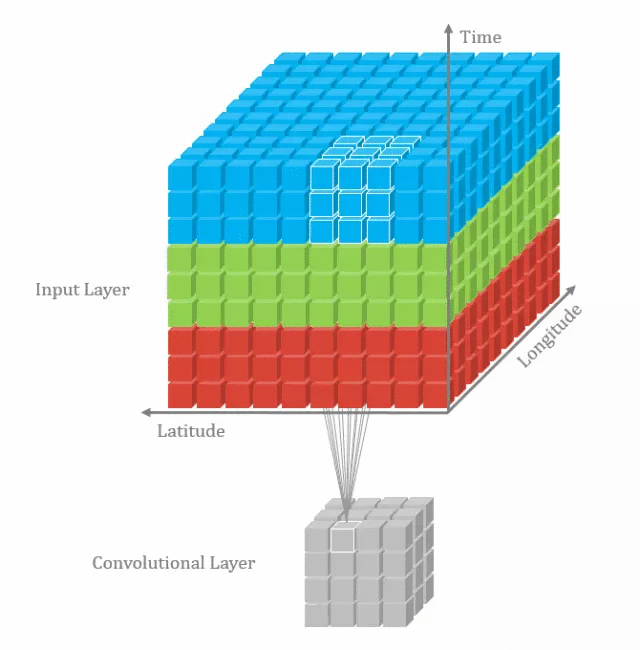

### 改写vgg3D

In [32]:

from keras.models import Sequential
from keras.layers import Dense,Conv3D,MaxPooling3D,Flatten
 

def vgg3D():
    model = Sequential()  #顺序模型，开始构建 model
    model.add(Conv3D(64, (3, 3,3),
           activation='relu',
           padding='same',
           name='block1_conv1',
           input_shape=(255,255,3,4)))
    model.add(Conv3D(64, (3, 3,3),
           activation='relu',
           padding='same',
           name='block1_conv2'))
    model.add(MaxPooling3D(
            pool_size=(2, 2,2),
            strides=(2, 2,2),
            name='block1_pool',
            padding='same'))
    model.add(Conv3D(128, (3, 3,3),
                      activation='relu',
                      padding='same',
                      name='block2_conv1'))
    model.add(Conv3D(128, (3, 3,3),
           activation='relu',
           padding='same',
           name='block2_conv2'))
 
 
    model.add(MaxPooling3D((2,2, 2), strides=(2,2, 2),padding='same', name='block2_pool'))
 
    model.add(Conv3D(256, (3, 3,3),
                      activation='relu',
                      padding='same',
                      name='block3_conv1'))
    model.add(Conv3D(256, (3,3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv2'))
    model.add(Conv3D(256, (3,3, 3),
                      activation='relu',
                      padding='same',
                      name='block3_conv3'))
    model.add(MaxPooling3D((2,2, 2), strides=(2,2, 2),padding='same', name='block3_pool'))
    model.add(Conv3D(512, (3,3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv1'))
    model.add(Conv3D(512, (3,3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv2'))
    model.add(Conv3D(512, (3,3, 3),
                      activation='relu',
                      padding='same',
                      name='block4_conv3'))
    model.add(MaxPooling3D((2,2, 2), strides=(2,2, 2),padding='same', name='block4_pool'))
    model.add(Conv3D(512, (3,3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv1'))
    model.add(Conv3D(512, (3,3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv2'))
 
    model.add(Conv3D(512, (3,3, 3),
                      activation='relu',
                      padding='same',
                      name='block5_conv3'))
    model.add(MaxPooling3D((2,2, 2), strides=(2,2, 2),padding='same', name='block5_pool'))
 
    model.add(Flatten(name='flatten'))
    model.add(Dense(4096, activation='relu',name='fc1'))
 
    model.add(Dense(4096, activation='relu',name='fc2'))
 
    model.add(Dense(2, activation='sigmoid', name='predictions'))
    print(model.summary())
    return model


In [33]:
vgg3D()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv3D)        (None, 255, 255, 3, 64)   6976      
_________________________________________________________________
block1_conv2 (Conv3D)        (None, 255, 255, 3, 64)   110656    
_________________________________________________________________
block1_pool (MaxPooling3D)   (None, 128, 128, 2, 64)   0         
_________________________________________________________________
block2_conv1 (Conv3D)        (None, 128, 128, 2, 128)  221312    
_________________________________________________________________
block2_conv2 (Conv3D)        (None, 128, 128, 2, 128)  442496    
_________________________________________________________________
block2_pool (MaxPooling3D)   (None, 64, 64, 1, 128)    0         
_________________________________________________________________
block3_conv1 (Conv3D)        (None, 64, 64, 1, 256)   

#### 空间池降低了每个特征映射的维度，但是保留了最重要的信息，

空间池可以有多种形式：最大（Max）,平均（Average），求和（Sum）
以最大池化为例，我们定义了空间上的邻域（2x2的窗）并且从纠正特征映射中取出窗里最大的元素。除了取最大值以额外，我们也可以取平均值（平均池化）或者把窗里所有元素加起来。实际上，最大池化已经显示了最好的成效。

池化的作用
池化的功能室逐步减少输入表征的空间尺寸。特别地，池化

使输入表征（特征维度）更小而易操作
减少网络中的参数与计算数量，从而遏制过拟合
增强网络对输入图像中的小变形、扭曲、平移的鲁棒性（输入里的微小扭曲不会改变池化输出——因为我们在局部邻域已经取了最大值/平均值）。
帮助我们获得不因尺寸而改变的等效图片表征。这非常有用，因为这样我们就可以探测到图片里的物体，不论那个物体在哪。

#### optimizers
* SGD
* RMSprop
* Adadelta

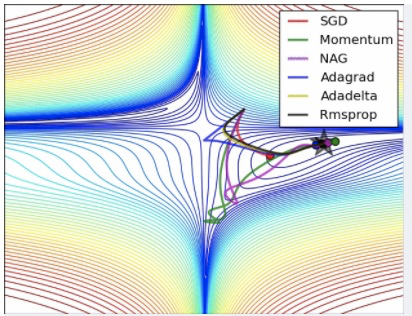

### keras将两个独立的模型融合起来(多输入单输出)

https://blog.csdn.net/DoReAGON/article/details/97172795?utm_term=keras%E7%89%B9%E5%BE%81%E8%9E%8D%E5%90%88&utm_medium=distribute.pc_aggpage_search_result.none-task-blog-2~all~sobaiduweb~default-6-97172795&spm=3001.4430

In [ ]:

实时模型融合，也叫做多输入模型，用keras就是下面这样搭建：
def multi_input_model():
    # 78代表第一个模型输入维度
    input1_ = Input(shape=(78,), name='input1')
    # 1代表第而个模型输入维度    
    input2_ = Input(shape=(1,), name='input2')    
    print(input1_.shape) 
    
    x1 = Dense(15, activation='relu')(input1_)    
    
    # x2 = Dense(16, activation='relu')(input2_)
    x2=input2_    
    x = concatenate([x1, x2])   #拼接 
    
    # x1 = Dense(16, activation='relu')(x1)    
    
    # x2 = Dense(16, activation='relu')(x2)
    
    print(x1.shape)    
    print(x2.shape)    
    x = Dense(16, activation='relu')(x)    
    output_ = Dense(1, activation='sigmoid', name='output')(x)    
    model = Model(inputs=[input1_, input2_], outputs=[output_])    
    return model